
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_train = X_train / 255
X_test = X_test / 255
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

print("X_train.shape: {0}, Y_train.shape: {1}".format(X_train.shape, Y_train.shape))

X_train.shape: (60000, 784), Y_train.shape: (60000, 10)


In [3]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
model = Sequential()

#   第二步：構建網絡層
model.add(Dense(500, input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense(500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense(500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense(500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense(10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [4]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [5]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [6]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

'''
Adam optimizer
'''
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

opt_list = [sgd, rmsprop, adam]

Optimizer = <keras.optimizers.SGD object at 0x000000001D99A5F8>
Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 6s 135us/step - loss: 0.1532 - acc: 0.9468 - val_loss: 0.0612 - val_acc: 0.9791
Epoch 2/20
42000/42000 [==============================] - 5s 121us/step - loss: 0.0509 - acc: 0.9833 - val_loss: 0.0439 - val_acc: 0.9855
Epoch 3/20
42000/42000 [==============================] - 5s 121us/step - loss: 0.0394 - acc: 0.9871 - val_loss: 0.0378 - val_acc: 0.9875
Epoch 4/20
42000/42000 [==============================] - 5s 121us/step - loss: 0.0324 - acc: 0.9895 - val_loss: 0.0323 - val_acc: 0.9895
Epoch 5/20
42000/42000 [==============================] - 5s 122us/step - loss: 0.0273 - acc: 0.9912 - val_loss: 0.0288 - val_acc: 0.9908
Epoch 6/20
42000/42000 [==============================] - 5s 130us/step - loss: 0.0234 - acc: 0.9927 - val_loss: 0.0258 - val_acc: 0.9917
Epoch 7/20
42000/42000 [==============================] - 

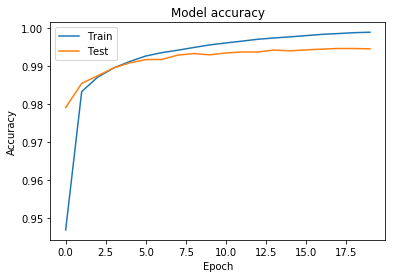

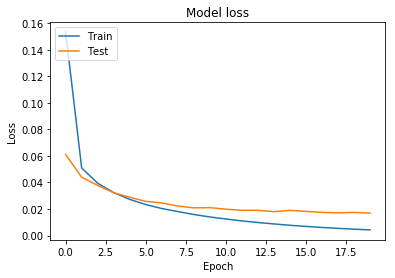

Optimizer = <keras.optimizers.RMSprop object at 0x000000001D99AA58>
Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 6s 144us/step - loss: 0.1352 - acc: 0.9820 - val_loss: 0.0288 - val_acc: 0.9914
Epoch 2/20
42000/42000 [==============================] - 6s 141us/step - loss: 0.0206 - acc: 0.9939 - val_loss: 0.0207 - val_acc: 0.9938
Epoch 3/20
42000/42000 [==============================] - 6s 137us/step - loss: 0.0171 - acc: 0.9952 - val_loss: 0.0274 - val_acc: 0.9935
Epoch 4/20
42000/42000 [==============================] - 6s 139us/step - loss: 0.0161 - acc: 0.9957 - val_loss: 0.0292 - val_acc: 0.9938
Epoch 5/20
42000/42000 [==============================] - 6s 138us/step - loss: 0.0152 - acc: 0.9963 - val_loss: 0.0279 - val_acc: 0.9947
Epoch 6/20
42000/42000 [==============================] - 6s 137us/step - loss: 0.0131 - acc: 0.9968 - val_loss: 0.0315 - val_acc: 0.9938
Epoch 7/20
42000/42000 [==============================

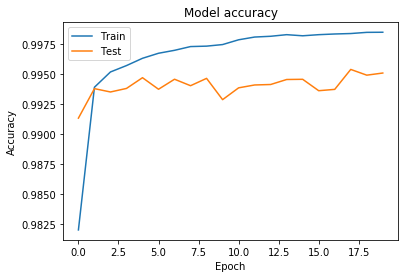

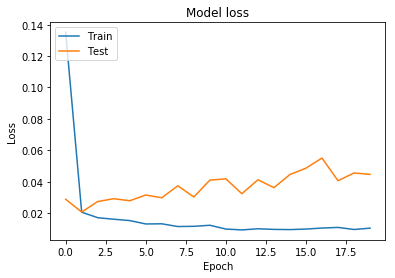

Optimizer = <keras.optimizers.Adam object at 0x000000001D99A518>
Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 7s 161us/step - loss: 0.0154 - acc: 0.9971 - val_loss: 0.0274 - val_acc: 0.9946
Epoch 2/20
42000/42000 [==============================] - 6s 150us/step - loss: 0.0061 - acc: 0.9986 - val_loss: 0.0261 - val_acc: 0.9949
Epoch 3/20
42000/42000 [==============================] - 7s 156us/step - loss: 0.0052 - acc: 0.9987 - val_loss: 0.0206 - val_acc: 0.9957
Epoch 4/20
42000/42000 [==============================] - 7s 156us/step - loss: 0.0057 - acc: 0.9985 - val_loss: 0.0285 - val_acc: 0.9948
Epoch 5/20
42000/42000 [==============================] - 7s 159us/step - loss: 0.0064 - acc: 0.9983 - val_loss: 0.0237 - val_acc: 0.9952
Epoch 6/20
42000/42000 [==============================] - 7s 168us/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0262 - val_acc: 0.9949
Epoch 7/20
42000/42000 [==============================] -

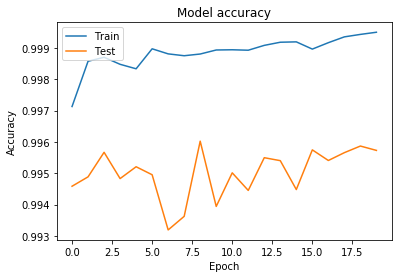

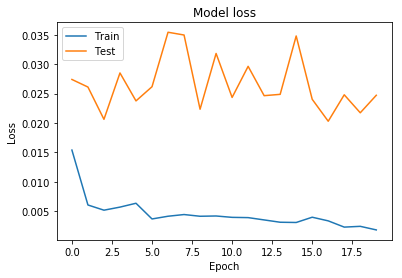

In [7]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size = 64
epochs = 20

# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

for opt in opt_list:
    print("Optimizer = {0}".format(opt))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x=X_train, y=Y_train,
                        batch_size=batch_size, epochs=epochs, 
                        shuffle=True, verbose=1, validation_split=0.3)
    
    #    第六步：輸出
    print ( " test set " )
    scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
    print ( "" )
    #print ( " The test loss is %f " % scores)
    print ( " The test loss is %f ", scores)
    result = model.predict(X_test,batch_size=200,verbose= 0)

    result_max = numpy.argmax(result, axis = 1 )
    test_max = numpy.argmax(Y_test, axis = 1 )

    result_bool = numpy.equal(result_max, test_max)
    true_num = numpy.sum(result_bool)
    print ( "" )
    print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()